In [40]:
import numpy as np

In [41]:
import pandas as pd

In [42]:
import matplotlib.pyplot as plt

In [43]:
import seaborn as sns

In [44]:
from matplotlib import rcParams

In [45]:
rcParams['figure.figsize'] = 15,5

In [46]:
sns.set_style('darkgrid')

In [47]:
customer_df = pd.read_csv('customers.csv', index_col = 'CustomerID')

In [48]:
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [49]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [50]:
customer_df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [51]:
customer_df.drop_duplicates(inplace = True)

In [52]:
x_var = customer_df.iloc[:,[2,3]].values

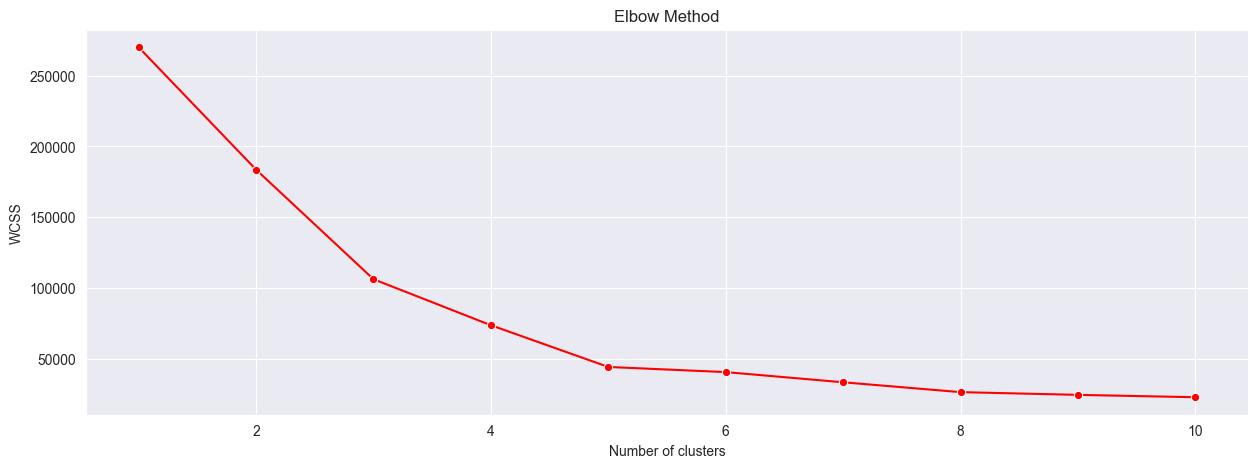

In [53]:
from sklearn.cluster import KMeans

# where we'll store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    # random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(x_var)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x =range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state = 42)
y_pred = kmeans.fit_predict(x_var)

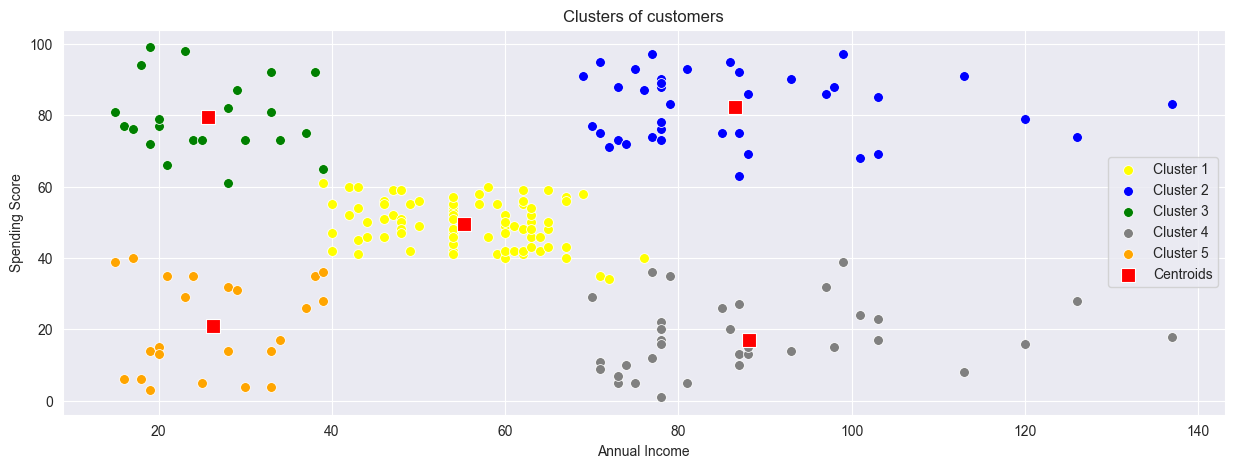

In [58]:
sns.scatterplot(x=x_var[y_pred == 0, 0], y=x_var[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=x_var[y_pred == 1, 0], y=x_var[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=x_var[y_pred == 2, 0], y=x_var[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=x_var[y_pred == 3, 0], y=x_var[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=x_var[y_pred == 4, 0], y=x_var[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()